In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


In [2]:
data=pd.read_csv('Mall_customers.csv')
data.head()
# we dont have any dependent and independent variables

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=data['Income']
y=data['SpendingScore']

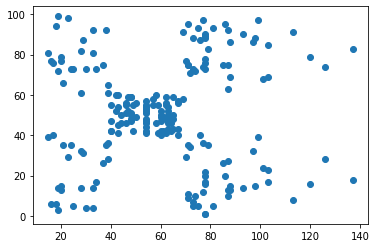

In [4]:
plt.scatter(x,y)
plt.show()

K-Means clustering
- plot the graph of k vs SSE
- SSE data points to ther closet center
- choose appropriate k where error is minimum or significantly not reducing further

Text(0, 0.5, 'SSE')

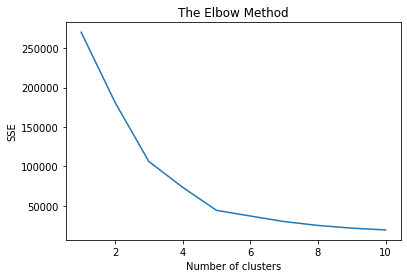

In [29]:
x=data.iloc[:, [3,4]].values

#using the elbow method to find the optimal number of cluster

ls=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    ls.append(km.inertia_) # sum of squared distances of samples to their closest cluster center
    
plt.plot(range(1,11),ls)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
    

from above plot, 5 is the ideal number of clusters

In [31]:
km= KMeans(n_clusters=5)
y_means= km.fit_predict(x)
print("the centres of clusters are:\n",km.cluster_centers_)
print("cluster labels:", km.labels_)

the centres of clusters are:
 [[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]
cluster labels: [2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 1 3 4 3 4 3 1 3 4 3 4 3 4 3 4 3 1 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


In [27]:
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

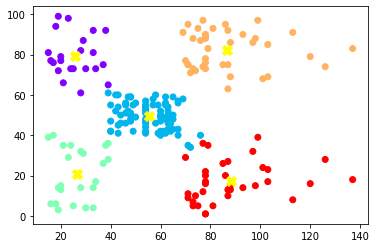

In [37]:
centers = np.array(km.cluster_centers_)
plt.scatter(x[:,0],x[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], s=100,marker="X", color='yellow', label='Centroids')
plt.show()

# Hierarchichal clustering
Linkage Methods:
- "ward" minimizes the variance of the clusters being merged.
- "average" uses the average of the distances of each observation of the two sets.
- "complete" or maximum linkage uses the maximum distances between all observations of the two sets.
- "single" uses the minimum of the distances between all observations of the two sets.


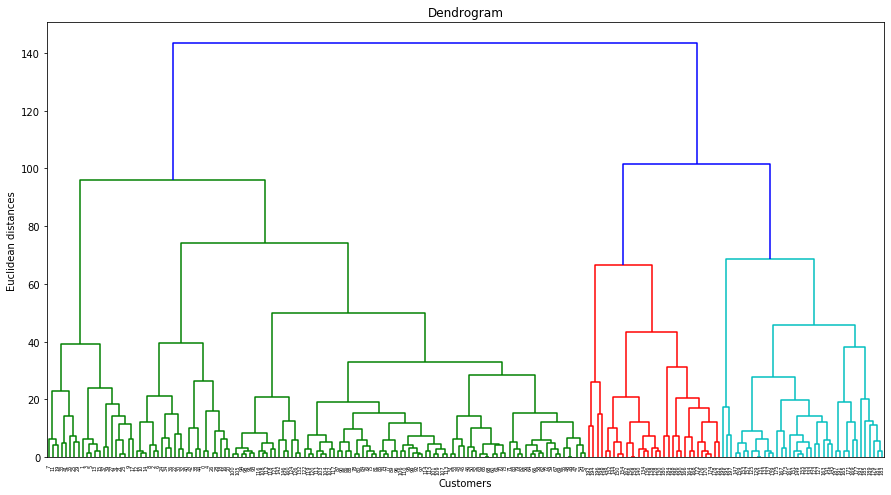

In [38]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))

dendrogram= sch.dendrogram(sch.linkage(x, method='complete'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

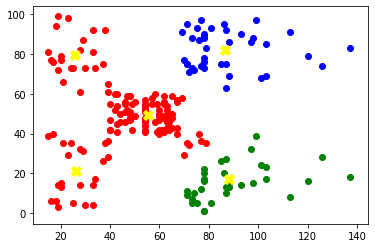

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')

y_hc= hc.fit_predict(x)
#centers = np.array(km.cluster_centers_)
plt.scatter(x[y_hc==0,0],x[y_hc==0,1], c='red',label='cluster 1' )
plt.scatter(x[y_hc==1,0],x[y_hc==1,1], c='blue',label='cluster 2' )
plt.scatter(x[y_hc==2,0],x[y_hc==2,1], c='green',label='cluster 3' )
plt.scatter(centers[:,0], centers[:,1], s=100,marker="X", color='yellow', label='Centroids')
plt.show()